# Data Preprocessing

In [89]:
# import data
import pandas as pd
from io import StringIO

In [90]:
csv_data = \
  """A,B,C,D
  1.0,2.0,3.0,4.0
  5.0,6.0,,8.0
  10,11,12"""

In [91]:
df= pd.read_csv(StringIO(csv_data))

In [92]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## Drop the nan data 

In [93]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [94]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


## Imputation (interpolation)

In [95]:
from sklearn.preprocessing import Imputer
import numpy as np

In [96]:
imr = Imputer(missing_values='NaN', strategy='mean',verbose=1,axis=0)

In [97]:
imr.fit(df.values)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=1)

In [98]:
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Categorical Data

In [99]:
 df = pd.DataFrame([
 ['green', 'M', 10.1, 'class1'],
 ['red', 'L', 13.5, 'class2'],
 ['blue', 'XL', 15.3, 'class1']])
 df.columns = ['color', 'size', 'price', 'classlabel']
 df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [100]:
size_mapping = {
 'XL': 3,
 'L': 2,
 'M': 1}
df['size']=df['size'].map(size_mapping)

### class label mapping

In [101]:
class_mapping ={k:v for v,k in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)

In [102]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [103]:
# reverse it
reverse_mapping = {k:v for v,k in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(reverse_mapping)

In [104]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### or use sklearn label encoder

In [105]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

In [106]:
y=class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [107]:
class_le.inverse_transform(y)

/home/wsun3/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

## Perform one-hot encoding

In [108]:
# one-hot encoding for categorical data
# for example, if we map 
# red: 1, green:2, blue=3
# the classifier tends to treat red as smaller than green, which is not optimal
# thus one-hot encoding convert the features to
# red: [1,0,0], green: [0,1,0], blue:[0,0,1]
from sklearn.preprocessing import OneHotEncoder

In [110]:
ohe = OneHotEncoder(categorical_features=[0])
X = np.array([[1,1,10.1],[2,2,13.5],[0,3,15.3]])

In [113]:
ohe.fit_transform(X).toarray() # ohe.fit_transform returns a sparse matrix, using option sparse=False to disable it

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [115]:
# more convieniently using dataframe.get_dummies method
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [118]:
# remove colinearity by adding option drop_first=True
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


# Partitioning the Data

In [123]:
# read wine data
df_wine = pd.read_csv('wine.data',header=None)
df_wine.columns = ['Class label', 'Alcohol',
 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium',
 'Total phenols', 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']


In [124]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [126]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values

In [127]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size=0.3,
 random_state=0,
 stratify=y)


# Bringing features on the same scale

In [128]:
# two methods 
# 1. Minmax Scaler   xn = x-x_min/(x_max - x_mim)
# 2. StandardScaler  xn = x-x_mean/(x_std)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
stdsc = StandardScaler()

In [129]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selceting meaningful features

In [130]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression(penalty='l1',C=1.0)
lr.fit(X_train_std,y_train)
print('Training accuracy:',lr.score(X_train_std,y_train))

Training accuracy: 1.0


In [133]:
print('Testing accruacy:',lr.score(X_test_std,y_test))

Testing accruacy: 1.0


In [135]:
lr.intercept_ # the bias term, w_0

array([-1.2635208 , -1.21601645, -2.37124283])

In [138]:
lr.coef_.shape # this w

(3, 13)

# show regularization path

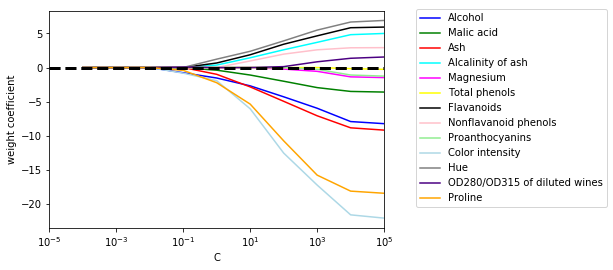

In [140]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
 'magenta', 'yellow', 'black',
 'pink', 'lightgreen', 'lightblue',
 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
 lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
 lr.fit(X_train_std, y_train)
 weights.append(lr.coef_[1])
 params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
 plt.plot(params, weights[:, column],
 label=df_wine.columns[column + 1],
 color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
bbox_to_anchor=(1.38, 1.03),
ncol=1, fancybox=True)
plt.show()


# Sequential feature selection algorithms

In [145]:
from SBS import *

In [146]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

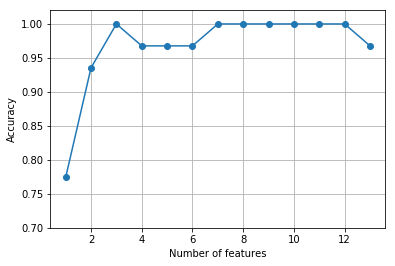

In [148]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [149]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

## Assessing feature importance with random forest

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


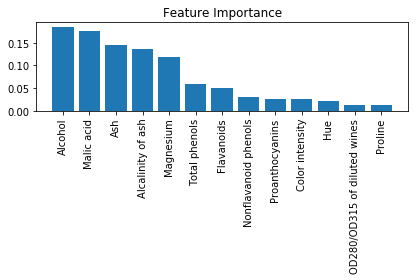

In [150]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,
 random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
 print("%2d) %-*s %f" % (f + 1, 30,
 feat_labels[indices[f]],
 importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
importances[indices],
 align='center')
plt.xticks(range(X_train.shape[1]),
 feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
